## Importing Labraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

### Upload dataset & preprocessing

In [7]:
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target #training labels (maligne = 0, benine = 1)
X = cancer_data.data   # 30 attributes
X = preprocessing.scale(X) # scale eachd data attributes to zero mean and unit varience 'some models need monotone transformations to the data'
# https://datascience.stackexchange.com/questions/32109/zero-mean-and-unit-variance

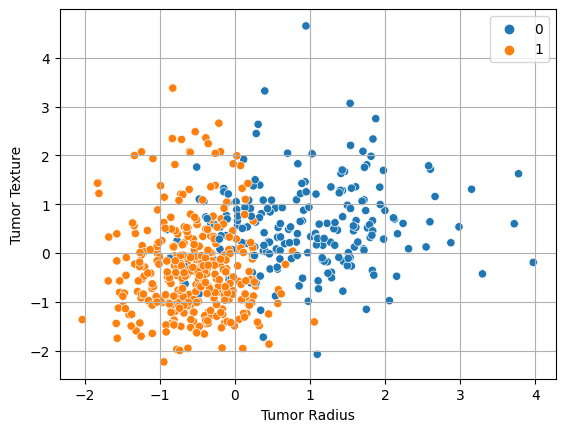

In [20]:
# Plot the first 2 attributes of training points
# plt.scatter(X[:, 0], X[:, 1])
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue=y)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

### Hyperparam tuning (using cross validation)

In [30]:
alpha = np.arange(1e-15, 1, 0.005)
val_scores = np.zeros(len(alpha), )

for i in range(len(alpha)): # for each alpha value
    # Set up SVM with hinge loss and l2 norm regularization
    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    # Calculate cross validation scores for 5-fold cross-validation
    score = ms.cross_val_score(model, X, y, cv=5)
    # print(score)
    val_scores[i] = score.mean() # Calculate mean of the 5 scores

# val_scores

### Plotting how cross validation score changes  with alpha

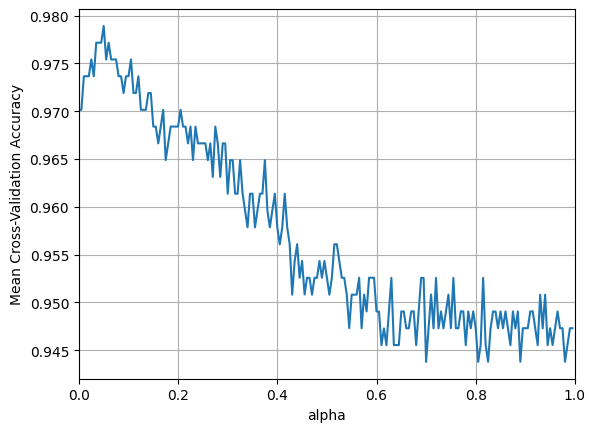

In [31]:
plt.plot(alpha, val_scores)
plt.xlim(0, 1)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid('True')
plt.show()

alpha_star = 0.050000000000001


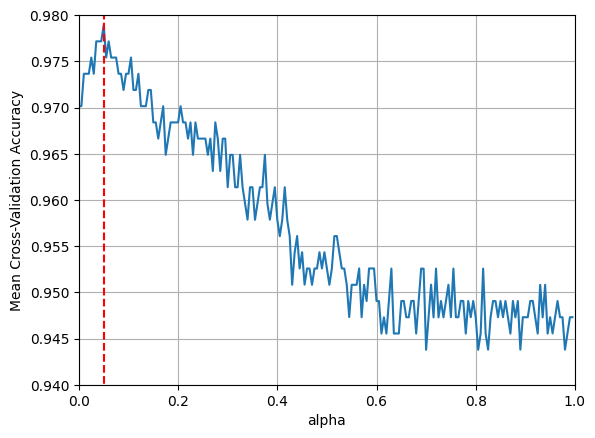

In [36]:
# Determine the alpha that maximizes the cross-validation score
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('alpha_star =', alpha_star)

plt.plot(alpha,val_scores)
plt.plot(np.ones(12)*alpha_star,np.arange(0,1.2,0.1),'--r')
plt.xlim(0,1)
plt.ylim(0.94,0.98)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

### Training model with alpha star

In [37]:
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha = alpha_star)
model_trained = model_star.fit(X, y)
print('Training Accuracy =', model_trained.score(X, y))

Training Accuracy = 0.9806678383128296


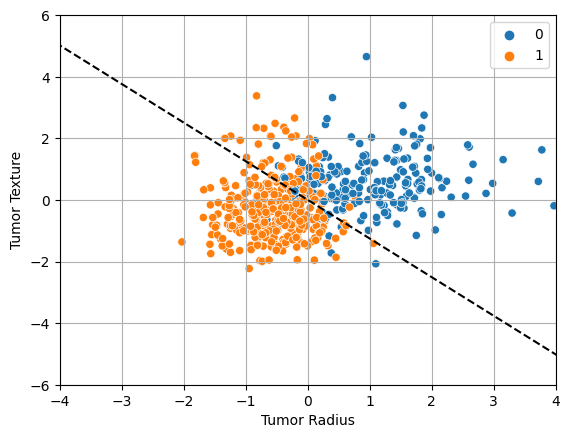

In [41]:
# Decision boundary of the training model
slope = model_trained.coef_[0,1]/-model_trained.coef_[0,0]    # didn't understand
x1 = np.arange(-10,10,0.5)
y1 = slope*x1
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue=y)
plt.plot(x1,y1,'--k')
plt.xlim(-4,4)
plt.ylim(-6,6)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()